In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('air_quality_no2_long.csv')
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [ ]:
df.isnull().sum()

city         0
country      0
date.utc     0
location     0
parameter    0
value        0
unit         0
dtype: int64

In [ ]:
df = df.loc[:,['city', 'date.utc','value']]
df.head()

,city,date.utc,value
2067,London,2019-05-07 01:00:00+00:00,23.0
2066,London,2019-05-07 02:00:00+00:00,19.0
2065,London,2019-05-07 03:00:00+00:00,19.0
2064,London,2019-05-07 04:00:00+00:00,16.0
2063,London,2019-05-07 06:00:00+00:00,26.0


In [ ]:
df = df.iloc[::-1]
df.head()

,city,date.utc,value
2067,London,2019-05-07 01:00:00+00:00,23.0
2066,London,2019-05-07 02:00:00+00:00,19.0
2065,London,2019-05-07 03:00:00+00:00,19.0
2064,London,2019-05-07 04:00:00+00:00,16.0
2063,London,2019-05-07 06:00:00+00:00,26.0


In [ ]:
df['city'].value_counts()

Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64

In [ ]:
#city = ['Paris', 'London', 'Antwerpen']

paris = df[df['city'] == 'Paris']
london = df[df['city'] == 'London']
antwerpen = df[df['city'] == 'Antwerpen']

city_name = [paris, london, antwerpen]

In [ ]:
paris.head()

,city,date.utc,value
1003,Paris,2019-05-07 01:00:00+00:00,25.0
1002,Paris,2019-05-07 02:00:00+00:00,27.7
1001,Paris,2019-05-07 03:00:00+00:00,50.4
1000,Paris,2019-05-07 04:00:00+00:00,61.9
999,Paris,2019-05-07 05:00:00+00:00,72.4


In [ ]:
for city in city_name:
  city['date.utc'] = pd.to_datetime(city['date.utc']).dt.tz_convert(None)
  city.set_index('date.utc', inplace=True)
  city.index= pd.date_range(start=city.index[0], periods=len(city), freq='H')

<ipython-input-70-3533c595eb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['date.utc'] = pd.to_datetime(city['date.utc']).dt.tz_convert(None)
<ipython-input-70-3533c595eb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['date.utc'] = pd.to_datetime(city['date.utc']).dt.tz_convert(None)
<ipython-input-70-3533c595eb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

2019-05-07 01:00:00    Paris
2019-05-07 02:00:00    Paris
2019-05-07 03:00:00    Paris
2019-05-07 04:00:00    Paris
2019-05-07 05:00:00    Paris
                       ...  
2019-06-17 16:00:00    Paris
2019-06-17 17:00:00    Paris
2019-06-17 18:00:00    Paris
2019-06-17 19:00:00    Paris
2019-06-17 20:00:00    Paris
Freq: H, Name: city, Length: 1004, dtype: object
2019-05-07 01:00:00    London
2019-05-07 02:00:00    London
2019-05-07 03:00:00    London
2019-05-07 04:00:00    London
2019-05-07 05:00:00    London
                        ...  
2019-06-16 05:00:00    London
2019-06-16 06:00:00    London
2019-06-16 07:00:00    London
2019-06-16 08:00:00    London
2019-06-16 09:00:00    London
Freq: H, Name: city, Length: 969, dtype: object
2019-05-07 01:00:00    Antwerpen
2019-05-07 02:00:00    Antwerpen
2019-05-07 03:00:00    Antwerpen
2019-05-07 04:00:00    Antwerpen
2019-05-07 05:00:00    Antwerpen
                         ...    
2019-05-10 19:00:00    Antwerpen
2019-05-10 20:00:00    

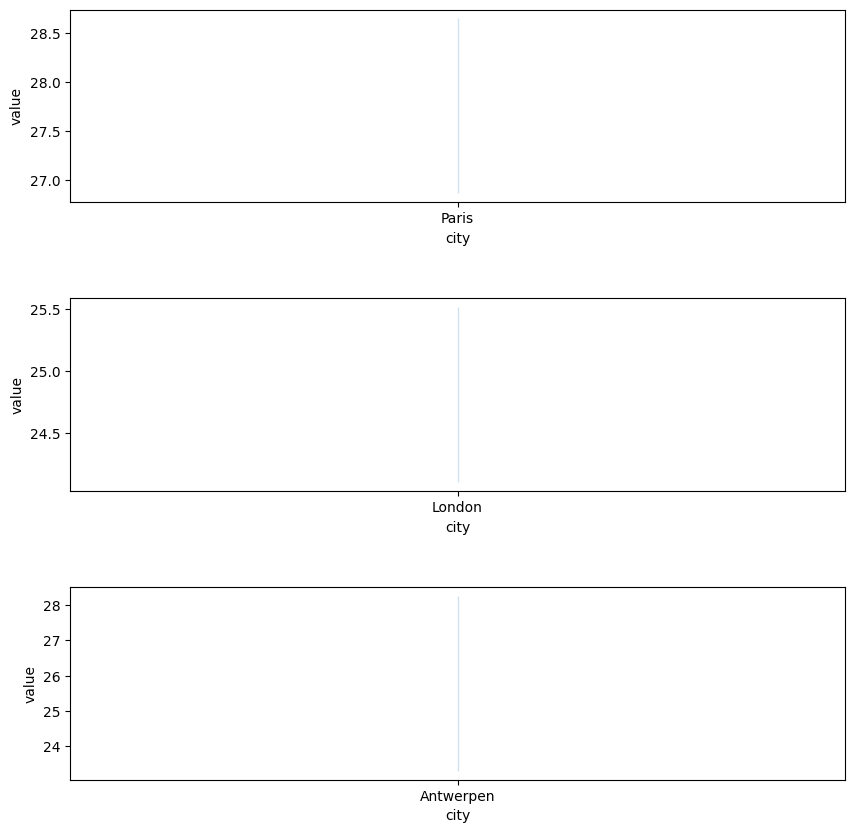

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, c in enumerate(city_name):
  plt.subplot(3,1,i+1)
  sns.lineplot(x=c['city'], y = c['value'])

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   city      2068 non-null   object             
 1   date.utc  2068 non-null   datetime64[ns, UTC]
 2   value     2068 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 48.6+ KB


In [ ]:
    df_dong['Datetime'] = pd.to_datetime(df_dong['기준일ID'].astype(str) + df_dong['시간대구분'].astype(str).str.zfill(2), format='%Y%m%d%H')
    df_dong.set_index('Datetime', inplace=True)
